In [3]:
!pip install pydrive

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras import backend as K

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({ 'id':'18hWXpKxKdzlrmgtRRAHeRwtfTQQ4kWVw'})

In [17]:
download.GetContentFile('train.zip')
!unzip train.zip

Archive:  train.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  inflating: data/test/18561.jpg     
  

In [0]:
##Loading images to a list
def convertToList(train):
  train_img = []
  for i in tqdm(range(train.shape[0])):
    img = image.load_img(name+'/train/'+train['image_id'][i].astype('str')+'.jpg',target_size=(60,60,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255
    train_img.append(img)
  return np.array(train_img)

In [19]:
train = pd.read_csv('data/train.csv')
train.head()
X = convertToList(train)

100%|██████████| 18540/18540 [01:37<00:00, 190.01it/s]


In [0]:
y = train['category'].values
NUM_CLASSES = 103
##flower_classes = []

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


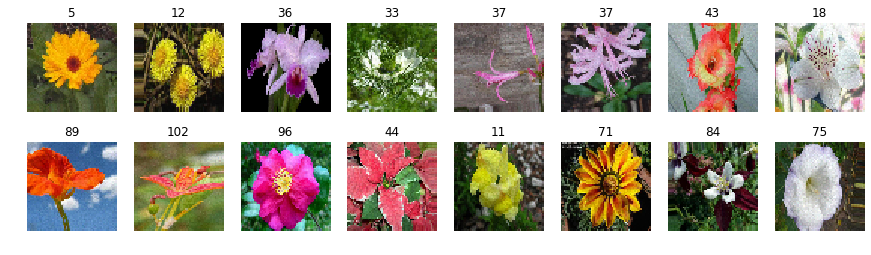

In [22]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(y_train[random_index])
plt.show()

In [0]:
##Normalize dataset and covert labels to one-hot encoded form
x_train = X_train - 0.5
x_test = X_test - 0.5
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
##making model of layers
def make_model():
  model = Sequential()
  
  model.add(Conv2D(16,(3,3),padding='same',input_shape=(60,60,3)))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(32,(3,3),padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(32,(3,3),padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(LeakyReLU(0.1))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(256))
  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.5))
  model.add(Dense(NUM_CLASSES))
  model.add(Activation('softmax'))
 
  return model

In [25]:
model = make_model()
model.summary()

NameError: ignored

# Training model


In [27]:
INIT_LR = 52-3
BATCH_SIZE = 32
EPOCHS = 10

model = make_model()


model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.adamax(lr=INIT_LR),
      metrics=['accuracy']
)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
filename = 'datase.{0:03d}.hdf5'
last_epoch = None

In [29]:
model.fit(
    x_train, y_train,
    batch_size = BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test,y_test),
    shuffle=True,
    verbose=0,
    initial_epoch = last_epoch or 0
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.save_weights("weights.h5")

In [0]:
model.load_weights("weights.h5")

In [0]:
# make test predictions
y_pred_test = model.predict_proba(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [0]:
def convertToList(train):
  train_img = []
  for i in tqdm(range(test.shape[0])):
    img = image.load_img('data/test/'+test['image_id'][i].astype('str')+'.jpg',target_size=(60,60,3), grayscale = False)
    img = image.img_to_array(img)
    img = img/255-0.5
    train_img.append(img)
  return np.array(train_img)

In [42]:
test = pd.read_csv('data/test.csv')
test = convertToList(test)

100%|██████████| 2009/2009 [00:08<00:00, 223.38it/s]


In [0]:
prediction = model.predict_classes(test)

In [46]:
prediction.

array([51, 51, 51, ..., 51, 51, 51])